In [1]:
# 计算相关的库
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import sacpy as scp
import scipy.signal as signal
import metpy.calc as mpcalc          #里面有各种计算函数
import metpy.constants as constants  #里面是常数
from metpy.units import units        #里面是单位

In [2]:
# 绘图相关的库
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
from cnmaps import get_adm_maps, draw_maps, draw_map
import cmaps
import sacpy.Map

ERROR 1: PROJ: proj_create_from_database: Open of /usr/local/share/proj failed


In [3]:
plt.rc('font',family='WenQuanYi Zen Hei') # 设置字体
plt.rc('axes', unicode_minus=False) # 正常显示负号

In [ ]:
# import cnmaps
# jnhn = cnmaps.read_mapjson('/work/jnhn')

## 绘图公用参数设置

In [4]:
# 全球
def comset(ax):
    ax.coastlines()
    ax.add_feature(cfeature.RIVERS,edgecolor='navy', linewidth=0.6)
    ax.add_feature(cfeature.LAKES,edgecolor='navy',facecolor='none', linewidth=0.6)
    draw_maps(get_adm_maps(level='国'))
    ax.set_aspect('auto')

    xticks = np.arange(0,361,60)
    yticks = np.arange(-90,91,30)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    smallx = 10
    smally = 5
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    g = ax.gridlines(crs=ccrs.PlateCarree(),color='gray',linestyle=':')
    g.xlocator = MultipleLocator(30)
    g.ylocator = MultipleLocator(15)

In [5]:
# 除去大西洋和极地
def comset1(ax):
    ax.set_extent([30,240,-40,80],crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.LAKES,edgecolor='gray',facecolor='none')
    draw_maps(get_adm_maps(level='国'))
    ax.set_aspect('auto')

    xticks = np.arange(30,241,30)
    yticks = np.arange(-40,81,20)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    smallx = 10
    smally = 5
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    
    g = ax.gridlines(crs=ccrs.PlateCarree(),color='gray',linestyle=':')
    g.xlocator = MultipleLocator(30)
    g.ylocator = MultipleLocator(20)

In [6]:
# 欧亚及太平洋中纬
def comset2(ax):
    ax.set_extent([60,240,-40,60],crs=ccrs.PlateCarree())
    # ax.coastlines('50m',edgecolor='gray')
    ax.coastlines(color='dimgray', linewidth=0.8)
    # ax.add_feature(cfeature.RIVERS.with_scale('50m'),edgecolor='gray')
    ax.add_feature(cfeature.RIVERS,edgecolor='navy', linewidth=0.6)
    ax.add_feature(cfeature.LAKES,edgecolor='navy',facecolor='none', linewidth=0.6)
    draw_maps(get_adm_maps(level='国'), linewidth=0.8)
    ax.set_aspect('auto')

    xticks = np.arange(60,241,30)
    yticks = np.arange(-40,61,20)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    smallx = 10
    smally = 5
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    
    g = ax.gridlines(crs=ccrs.PlateCarree(),color='gray',linestyle=':')
    g.xlocator = MultipleLocator(30)
    g.ylocator = MultipleLocator(20)

In [7]:
# 中国及北太平洋
def comset3(ax):
    ax.set_extent([60,180,0,60],crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.RIVERS.with_scale('50m'),edgecolor='gray', linewidth=0.8)
    ax.add_feature(cfeature.LAKES,edgecolor='gray',facecolor='none', linewidth=0.8)
    draw_maps(get_adm_maps(level='国'), linewidth=0.8)
    draw_map(jnhn)
    ax.set_aspect('auto')

    xticks = np.arange(60,181,30)
    yticks = np.arange(0,61,20)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    smallx = 10
    smally = 5
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    
    g = ax.gridlines(crs=ccrs.PlateCarree(),color='gray',linestyle=':')
    g.xlocator = MultipleLocator(30)
    g.ylocator = MultipleLocator(20)

In [8]:
# 看急流
def comset4(ax):
    ax.set_extent([0,360,-30,70],crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.LAKES,edgecolor='gray',facecolor='none', linewidth=0.8)
    draw_maps(get_adm_maps(level='国'), linewidth=0.8)
    ax.set_aspect('auto')

    xticks = np.arange(0,361,60)
    yticks = np.arange(-30,71,20)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    smallx = 10
    smally = 10
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    
    g = ax.gridlines(crs=ccrs.PlateCarree(),color='gray',linestyle=':')
    g.xlocator = MultipleLocator(60)
    g.ylocator = MultipleLocator(20)

In [9]:
# omega
def comset5(ax):
    ax.set_extent([60,270,-20,60],crs=ccrs.PlateCarree())
    # ax.coastlines('50m',edgecolor='gray')
    ax.coastlines(linewidth=0.8)
    # ax.add_feature(cfeature.RIVERS.with_scale('50m'),edgecolor='gray')
    ax.add_feature(cfeature.RIVERS,edgecolor='navy', linewidth=0.6)
    ax.add_feature(cfeature.LAKES,edgecolor='navy',facecolor='none', linewidth=0.6)
    draw_maps(get_adm_maps(level='国'), linewidth=0.8)
    draw_map(jnhn)
    ax.set_aspect('auto')

    xticks = np.arange(60,271,30)
    yticks = np.arange(-20,61,20)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    smallx = 10
    smally = 5
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    
    g = ax.gridlines(crs=ccrs.PlateCarree(),color='gray',linestyle=':')
    g.xlocator = MultipleLocator(30)
    g.ylocator = MultipleLocator(20)

In [10]:
# 中国
def conset(ax):
    ax.set_extent([60,150,0,60],crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.8)
    ax.add_feature(cfeature.RIVERS.with_scale('50m'),edgecolor='gray', linewidth=0.8)
    ax.add_feature(cfeature.LAKES,edgecolor='gray',facecolor='none', linewidth=0.8)
    draw_maps(get_adm_maps(level='国'), linewidth=0.8)
    draw_maps(get_adm_maps(level='省'), linewidth=0.5)
    ax.set_aspect('auto')

    xticks = np.arange(60,151,30)
    yticks = np.arange(0,61,15)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    smallx = 10
    smally = 5
    ax.xaxis.set_minor_locator(MultipleLocator(smallx))
    ax.yaxis.set_minor_locator(MultipleLocator(smally))
    
    g = ax.gridlines(crs=ccrs.PlateCarree(),color='gray',linestyle=':')
    g.xlocator = MultipleLocator(30)
    g.ylocator = MultipleLocator(15)

In [11]:
# 所研究的jnhn区域
def conset1(ax):
    ax.set_extent([103,125,20,32],crs=ccrs.PlateCarree())
    # ax.coastlines()
    draw_map(jnhn)
    draw_maps(get_adm_maps(level='省'), linewidth=0.5)
    ax.set_aspect('auto')

    xticks = np.arange(105,126,5)
    yticks = np.arange(20,33,5)
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    
    g = ax.gridlines(crs=ccrs.PlateCarree(),color='gray',linestyle=':')
    g.xlocator = MultipleLocator(5)
    g.ylocator = MultipleLocator(5)

# 提取出中国冬季降水

In [12]:
xr.open_dataset('precip.mon.mean.0.5x0.5.nc')

<xarray.Dataset>
Dimensions:  (time: 903, lon: 720, lat: 360)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-03-01
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.10 (https://mpimet.mpg...
    institution:    NOAA ESRL/PSD
    Conventions:    CF-1.2
    title:          Precipitation Reconstruction over Land (PREC/L): 0.5x0.5
    platform:       Analyses
    citation:       Chen, M., P. Xie, J. E. Janowiak, and P. A. Arkin, 2002: ...
    dataset_title:  Precipitation Reconstruction over Land (PREC/L)
    data_modified:  2019-02-25
    References:     http://www.psl.noaa.gov/data/gridded/data.precl.html
    CDO:            Climate Data Operators version 1.9.10 (https://mpimet.mpg...
    history:        27-Apr-2023 21:14:24 Subset NOAA/PSL

In [13]:
pr = xr.open_dataset('precip.mon.mean.0.5x0.5.nc')['precip'].loc[{'time':slice('1960','2023'),'lat':slice(60,0),'lon':slice(70,140)}]
prd = scp.spec_moth_yrmean(pr,months=[12,1,2]) # 选出每年的冬季（当年12月&次年1、2月）
prd

<xarray.DataArray 'precip' (time: 63, lat: 120, lon: 140)>
array([[[0.7776496 , 0.7813542 , 0.78974754, ..., 0.37608   ,
         0.34574556, 0.31292108],
        [0.81474   , 0.7997106 , 0.78713816, ..., 0.40089178,
         0.36951008, 0.33648857],
        [0.8526891 , 0.82621163, 0.7958517 , ..., 0.44957015,
         0.40217614, 0.36341223],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.6427728 , 0.6523126 , 0.67171997, ..., 0.6314503 ,
         0.6356843 , 0.64232016],
        [0.5868018 , 0.59548527, 0.6068338 , ..., 0.58311844,
         0.58118093, 0.5786312 ],
        [0.5336916 , 0.53558   , 0.537444  , ..., 0.56378764,
         0.5373849 , 0.5209215 ],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.8818879 , 0.8697278 , 0.86208314, ..., 0.18593867,
         0.18069935, 0.17577797],
        [0.8427968 , 0.83373994, 0.82824534, ..., 0.16880192,
         0.16417764, 0.16021363],
        [0.81923574, 0.80825204, 0.79577154, ..., 0.17054112,
         0.15893847, 0.15168212],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time     (time) int64 1960 1961 1962 1963 1964 ... 2018 2019 2020 2021 2022
  * lon      (lon) float32 70.25 70.75 71.25 71.75 ... 138.2 138.8 139.2 139.8
  * lat      (lat) float32 59.75 59.25 58.75 58.25 57.75 ... 1.75 1.25 0.75 0.25

In [14]:
china = get_adm_maps(level='国', record='first', only_polygon=True, wgs84=True)
lons, lats = np.meshgrid(prd.lon, prd.lat)
prdchina = china.maskout(lons,lats,prd) # 白化中国以外的数据
prdc = ~(prdchina.mask)*prd # 中国的降水
prdc

<xarray.DataArray 'precip' (time: 63, lat: 120, lon: 140)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) int64 1960 1961 1962 1963 1964 ... 2018 2019 2020 2021 2022
  * lon      (lon) float32 70.25 70.75 71.25 71.75 ... 138.2 138.8 139.2 139.8
  * lat      (lat) float32 59.75 59.25 58.75 58.25 57.75 ... 1.75 1.25 0.75 0.25

/usr/local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/cmaps/cmaps.py:7070: UserWarning: Overwriting the cmap 'wh_bl_gr_ye_re' that was already in the registry.
  matplotlib.cm.register_cmap(name=cname, cmap=cmap)
/usr/local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'projection'
  result = super().contourf(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn

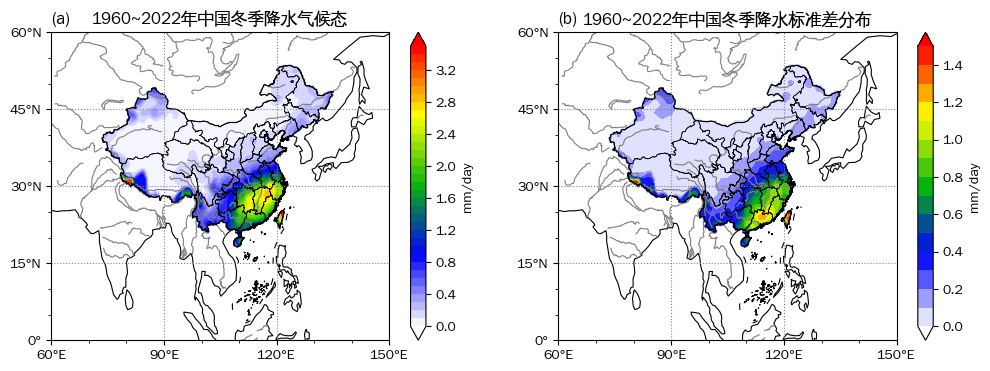

In [15]:
fig = plt.figure(figsize=[12,4])
ax = fig.add_subplot(121,projection=ccrs.PlateCarree())
conset(ax)
m = ax.contourf(lons, lats, prdc.mean('time'),projection=ccrs.PlateCarree(), 
            cmap=cmaps.wh_bl_gr_ye_re, levels=np.arange(0,3.6,0.1), extend='both')
ax.set_title("1960~2022年中国冬季降水气候态")
ax.set_title('(a)',loc='left')
cb = plt.colorbar(m)
cb.set_label('mm/day')

ax = fig.add_subplot(122,projection=ccrs.PlateCarree())
conset(ax)
m = ax.contourf(lons, lats, prdc.std('time'),projection=ccrs.PlateCarree(), 
            cmap=cmaps.wh_bl_gr_ye_re, levels=np.arange(0,1.51,0.1), extend='both')
ax.set_title("1960~2022年中国冬季降水标准差分布")
ax.set_title('(b)',loc='left')
cb = plt.colorbar(m)
cb.set_label('mm/day')

# 选区域

In [16]:
hunan = get_adm_maps(province='湖南省', only_polygon=True, record='first')
jiangxi = get_adm_maps(province='江西省', only_polygon=True, record='first')
zhejiang = get_adm_maps(province='浙江省', only_polygon=True, record='first')
fujian = get_adm_maps(province='福建省', only_polygon=True, record='first')
guangdong = get_adm_maps(province='广东省', only_polygon=True, record='first')
guangxi = get_adm_maps(province='广西壮族自治区', only_polygon=True, record='first')
# hainan = get_adm_maps(province='海南省', only_polygon=True, record='first')
xianggang = get_adm_maps(province='香港特别行政区', only_polygon=True, record='first')
aomen = get_adm_maps(province='澳门特别行政区', only_polygon=True, record='first')
taiwan = get_adm_maps(province='台湾省', only_polygon=True, record='first')

jnhn = hunan + jiangxi + zhejiang + fujian + guangdong + guangxi + xianggang + aomen + taiwan

In [17]:
jnhn.to_file('/work/jnhn') # 上一步耗时较长，故保存所选区域，下次可直接调用：
# import cnmaps
# jnhn = cnmaps.read_mapjson('/work/jnhn')

In [18]:
# 挑出所关注的中国南方地区
lons, lats = np.meshgrid(prd.lon, prd.lat)
prdcjnhn = jnhn.maskout(lons,lats,prd)
prdsc = ~(prdcjnhn.mask)*prd

## 对区域内降水距平百分率进行EOF分析

In [19]:
prdsc_ap = (prdsc-prdsc.mean('time'))/prdsc.mean('time')

prdsc_ap_eof = scp.EOF(prdsc_ap)
prdsc_ap_eof.solve()
prdsc_ap_pc = prdsc_ap_eof.get_pc(npt=3)
prdsc_ap_pt = prdsc_ap_eof.get_pt(npt=3)
prdsc_ap_eof.get_varperc()

array([ 6.69716239e-01,  1.23293824e-01,  7.14139193e-02,  3.55174355e-02,
        2.42856555e-02,  1.56532619e-02,  8.68591852e-03,  8.16318206e-03,
        6.05382584e-03,  5.61530609e-03,  4.39581787e-03,  3.73177021e-03,
        2.90764566e-03,  2.73043197e-03,  2.12662667e-03,  1.65841868e-03,
        1.49292208e-03,  1.35374337e-03,  1.15546514e-03,  1.04461471e-03,
        9.30741255e-04,  7.62452662e-04,  6.57179102e-04,  6.35297154e-04,
        5.82145818e-04,  5.28618577e-04,  4.89523052e-04,  4.61689226e-04,
        4.00264777e-04,  3.90091736e-04,  3.37606238e-04,  3.12137272e-04,
        2.72162055e-04,  2.51776975e-04,  2.42961862e-04,  1.91896659e-04,
        1.77933747e-04,  1.67529623e-04,  1.40935386e-04,  1.23784848e-04,
        1.22305661e-04,  1.07975990e-04,  8.67737763e-05,  7.87789468e-05,
        7.74274449e-05,  6.33949458e-05,  6.03078734e-05,  5.33757120e-05,
        5.11991857e-05,  4.17680894e-05,  3.51146664e-05, -1.17922472e-09,
        3.06085276e-05,  

/usr/local/lib/python3.10/site-packages/cmaps/cmaps.py:6134: UserWarning: Overwriting the cmap 'precip_diff_12lev' that was already in the registry.
  matplotlib.cm.register_cmap(name=cname, cmap=cmap)
/usr/local/lib/python3.10/site-packages/cmaps/cmaps.py:6134: UserWarning: Overwriting the cmap 'precip_diff_12lev' that was already in the registry.
  matplotlib.cm.register_cmap(name=cname, cmap=cmap)
/usr/local/lib/python3.10/site-packages/cmaps/cmaps.py:6134: UserWarning: Overwriting the cmap 'precip_diff_12lev' that was already in the registry.
  matplotlib.cm.register_cmap(name=cname, cmap=cmap)


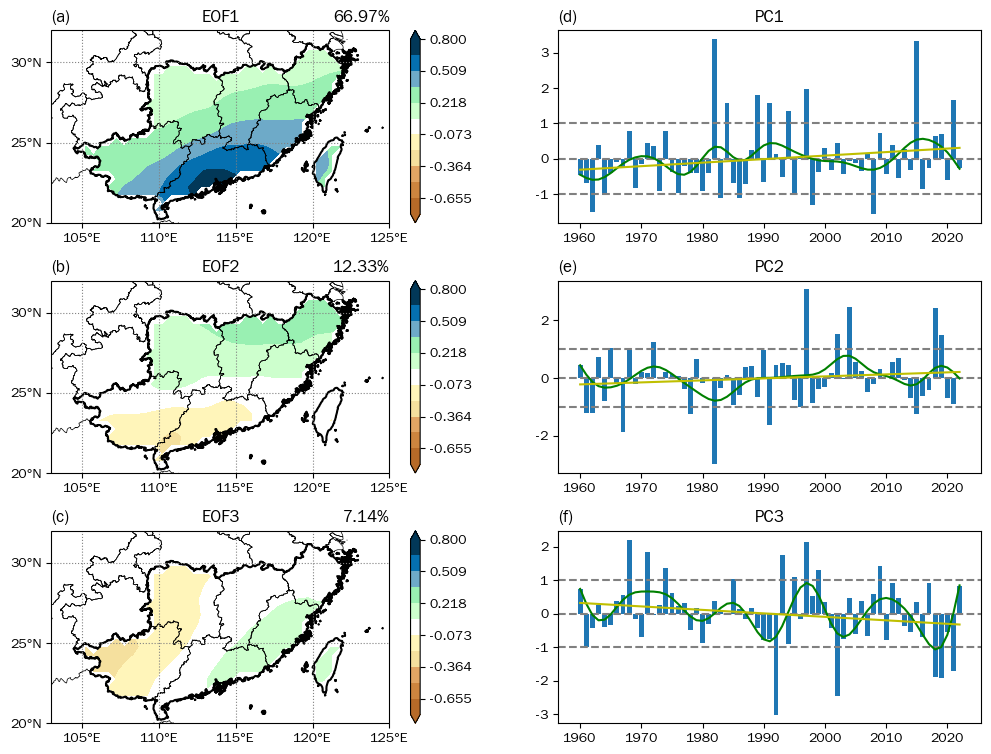

In [21]:
fig = plt.figure(figsize=[12,9])
fig.subplots_adjust(hspace=0.3)
for i in range(3):
    ax = fig.add_subplot(3,2,2*i+1, projection=ccrs.PlateCarree())
    conset1(ax)
    m = ax.contourf(prdsc.lon,prdsc.lat,prdsc_ap_pt[i],transform=ccrs.PlateCarree(),
                cmap=cmaps.precip_diff_12lev, levels=np.linspace(-0.8,0.8,12), extend='both')
    cb = plt.colorbar(m)
    ax.set_title(f'EOF{i+1}')
    ax.set_title(f'{prdsc_ap_eof.get_varperc()[i]:.2%}',loc='right')
    ax.set_title(f'({chr(97 + i)})',loc='left')
for i in range(3):
    ax = fig.add_subplot(3,2,2*i+2)
    ax.bar(prdsc.time, prdsc_ap_pc[i])
    ax.axhline(y=0, color='gray', linestyle='--')
    ax.axhline(y=1, color='gray', linestyle='--')
    ax.axhline(y=-1, color='gray', linestyle='--')
    # b, a = signal.butter(3, 2/3, 'highpass') 
    # ax.plot(prdsc.time, signal.filtfilt(b, a, prdsc_ap_pc[i]), c='orange')
    b, a = signal.butter(3, 0.2, 'lowpass') 
    ax.plot(prdsc.time, signal.filtfilt(b, a, prdsc_ap_pc[i]), c='g')
    # ax.plot(prdsc.time, signal.savgol_filter(prdsc_ap_pc[i],9,3), color='red')
    slope, intercept = np.polyfit(prdsc.time, prdsc_ap_pc[i], 1)
    linear_trend = slope * prdsc.time + intercept
    ax.plot(prdsc.time,linear_trend,c='y')
    ax.set_title(f'PC{i+1}')
    ax.set_title(f'({chr(100 + i)})', loc='left')

## 提取出PC1时间序列SCPC1

In [22]:
time = np.array(np.arange(1960,2023),dtype=np.int64)
scpc1 = xr.DataArray(prdsc_ap_pc[0],dims='time',coords=[time])

## 降水距平百分率区域平均标准化时间序列SCWPI

In [23]:
prdsc_apm = prdsc_ap.mean(('lon','lat'))
scwpi = prdsc_apm/prdsc_apm.std()

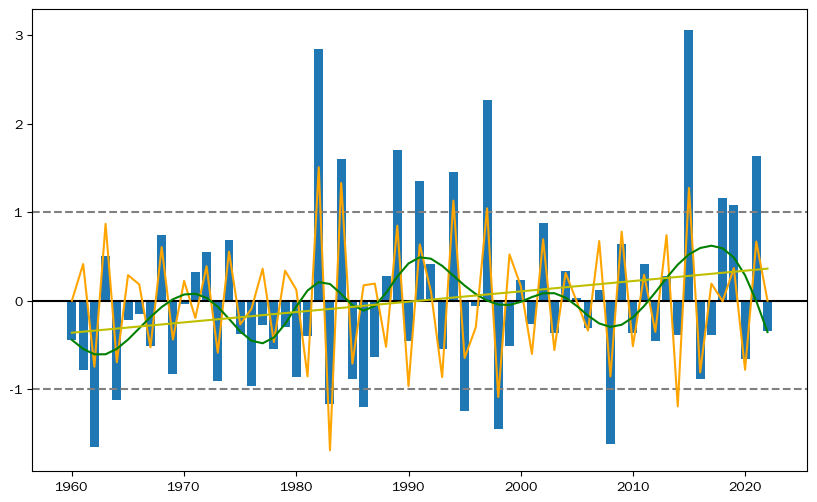

In [24]:
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)
ax.bar(scwpi.time, scwpi)
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=1, color='gray', linestyle='--')
ax.axhline(y=-1, color='gray', linestyle='--')

b, a = signal.butter(3, 2/3, 'highpass') 
ax.plot(scwpi.time, signal.filtfilt(b, a, scwpi), c='orange')
b, a = signal.butter(3, 0.2, 'lowpass') 
ax.plot(scwpi.time, signal.filtfilt(b, a, scwpi), c='g')
slope, intercept = np.polyfit(scwpi.time, scwpi, 1)
linear_trend = slope * scwpi.time + intercept
ax.plot(scwpi.time, linear_trend, c='y')

In [25]:
# 两个序列的相关系数
from scipy import stats
stats.pearsonr(scwpi,scpc1)

PearsonRResult(statistic=0.984325435425002, pvalue=1.1086419979782043e-47)

Text(0.0, 1.0, '(b)')

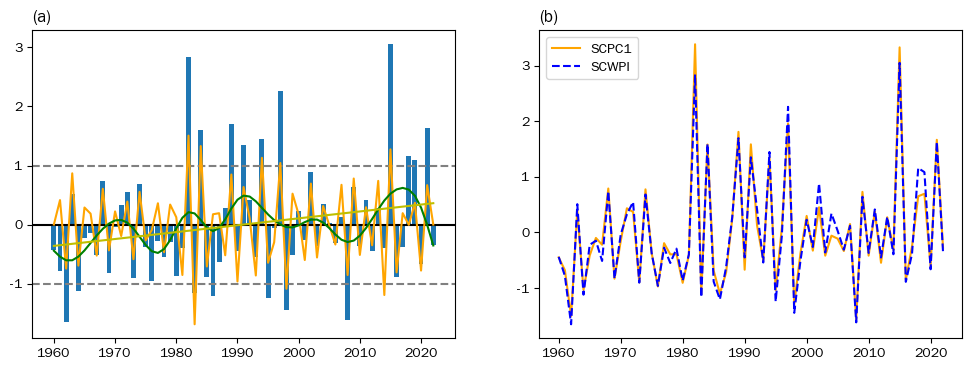

In [26]:
fig = plt.figure(figsize=[12,4])

ax = fig.add_subplot(121)
ax.bar(scwpi.time, scwpi)
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=1, color='gray', linestyle='--')
ax.axhline(y=-1, color='gray', linestyle='--')
b, a = signal.butter(3, 2/3, 'highpass') 
ax.plot(scwpi.time, signal.filtfilt(b, a, scwpi), c='orange')
b, a = signal.butter(3, 0.2, 'lowpass') 
ax.plot(scwpi.time, signal.filtfilt(b, a, scwpi), c='g')
slope, intercept = np.polyfit(scwpi.time, scwpi, 1)
linear_trend = slope * scwpi.time + intercept
ax.plot(scwpi.time, linear_trend, c='y')
ax.set_title('(a)', loc='left')

ax = fig.add_subplot(122)
ax.plot(scpc1.time, scpc1, color='orange', label='SCPC1')
ax.plot(scwpi.time, scwpi, 'b', linestyle='--', label='SCWPI')
ax.legend()
ax.set_title('(b)', loc='left')

## 选降水偏多（少）年

In [27]:
prdsc_hyr = scwpi[scwpi>1].time
prdsc_lyr = scwpi[scwpi<-1].time
prdsc_hyr, prdsc_lyr

(<xarray.DataArray 'time' (time: 10)>
 array([1982, 1984, 1989, 1991, 1994, 1997, 2015, 2018, 2019, 2021])
 Coordinates:
   * time     (time) int64 1982 1984 1989 1991 1994 1997 2015 2018 2019 2021,
 <xarray.DataArray 'time' (time: 7)>
 array([1962, 1964, 1983, 1986, 1995, 1998, 2008])
 Coordinates:
   * time     (time) int64 1962 1964 1983 1986 1995 1998 2008)

# 合成海平面气压

In [28]:
slp = xr.open_dataset('slp.mon.mean.nc')['slp'].loc['1960':'2023']

slpd = scp.spec_moth_yrmean(slp, months=[12,1,2])

slpdhm = slpd[slpd.time.isin(prdsc_hyr)].mean('time')
slpdlm = slpd[slpd.time.isin(prdsc_lyr)].mean('time')

slpda = slpd - slpd.mean('time')

slpdah_m, slpdah_pv = scp.one_mean_test(slpda[slpda.time.isin(prdsc_hyr)])
slpdal_m, slpdal_pv = scp.one_mean_test(slpda[slpda.time.isin(prdsc_lyr)])

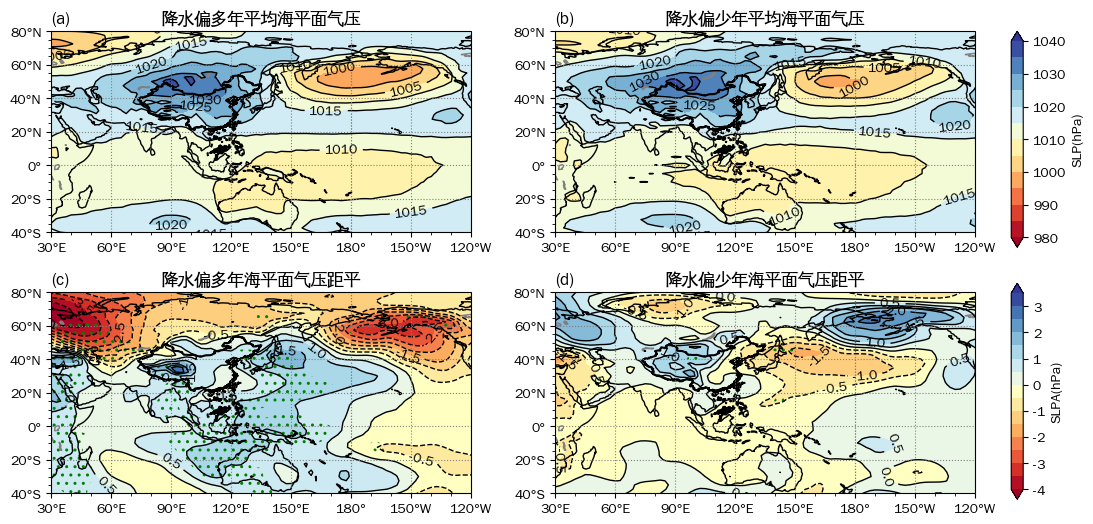

In [29]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(221, projection=ccrs.PlateCarree(central_longitude=180))
comset1(ax)
m1 = ax.contourf(slp.lon,slp.lat,slpdhm,transform=ccrs.PlateCarree(),
                cmap='RdYlBu',
                levels=np.arange(980,1041,5),extend='both'
               )
c1 = ax.contour(slp.lon,slp.lat,slpdhm,transform=ccrs.PlateCarree(),
               levels=np.arange(980,1041,5),
               colors='k',linewidths=1)

ax.clabel(c1)
ax.set_title('降水偏多年平均海平面气压')
ax.set_title('(a)',loc='left')

ax = fig.add_subplot(222, projection=ccrs.PlateCarree(central_longitude=180))
comset1(ax)
m1 = ax.contourf(slp.lon,slp.lat,slpdlm,transform=ccrs.PlateCarree(),
                cmap='RdYlBu',
                levels=np.arange(980,1041,5),extend='both'
               )
c1 = ax.contour(slp.lon,slp.lat,slpdlm,transform=ccrs.PlateCarree(),
               levels=np.arange(980,1041,5),
               colors='k',linewidths=1)

ax.clabel(c1)
ax.set_title('降水偏少年平均海平面气压')
ax.set_title('(b)',loc='left')

ax = fig.add_subplot(223, projection=ccrs.PlateCarree(central_longitude=180))
comset1(ax)
m3 = ax.contourf(slp.lon,slp.lat,slpdah_m,transform=ccrs.PlateCarree(), cmap='RdYlBu',levels=np.arange(-4,4.0,0.5),extend='both')
c3 = ax.contour(slp.lon,slp.lat,slpdah_m,transform=ccrs.PlateCarree(),levels=np.arange(-4,4.0,0.5),colors='k',linewidths=1)

ax.clabel(c3)
ax.sig_plot(slp.lon,slp.lat,slpdah_pv, thrshd=0.05, marker='..', color='green')
ax.set_title('降水偏多年海平面气压距平')
ax.set_title('(c)',loc='left')

ax = fig.add_subplot(224, projection=ccrs.PlateCarree(central_longitude=180))
comset1(ax)
m3 = ax.contourf(slp.lon,slp.lat,slpdal_m,transform=ccrs.PlateCarree(), cmap='RdYlBu',levels=np.arange(-4,4,0.5),extend='both')
c3 = ax.contour(slp.lon,slp.lat,slpdal_m,transform=ccrs.PlateCarree(),levels=np.arange(-4,4,0.5),colors='k',linewidths=1)

ax.clabel(c3)
ax.sig_plot(slp.lon,slp.lat,slpdal_pv, thrshd=0.05, marker='..', color='green')
ax.set_title('降水偏少年海平面气压距平')
ax.set_title('(d)',loc='left')

fig.subplots_adjust(left=0.13,hspace=0.3)
cbar1_ax = fig.add_axes([0.93, 0.52, 0.01, 0.36])
cbar3_ax = fig.add_axes([0.93, 0.10, 0.01, 0.36])
cb1 = fig.colorbar(m1, cax=cbar1_ax)
cb3 = fig.colorbar(m3, cax=cbar3_ax)
cb1.set_label('SLP(hPa)')
cb3.set_label('SLPA(hPa)')

# 合成500hPa位势高度

In [31]:
h500 = xr.open_dataset('hgt.mon.mean.nc')['hgt'].loc['1960':'2023',500]

h500d = scp.spec_moth_yrmean(h500, months=[12,1,2])

h500dhm = h500d[h500d.time.isin(prdsc_hyr)].mean('time')
h500dlm = h500d[h500d.time.isin(prdsc_lyr)].mean('time')

h500da = h500d - h500d.mean('time')

h500dah_m, h500dah_pv = scp.one_mean_test(h500da[h500da.time.isin(prdsc_hyr)])
h500dal_m, h500dal_pv = scp.one_mean_test(h500da[h500da.time.isin(prdsc_lyr)])

/usr/local/lib/python3.10/site-packages/cmaps/cmaps.py:440: UserWarning: Overwriting the cmap 'BlueWhiteOrangeRed' that was already in the registry.
  matplotlib.cm.register_cmap(name=cname, cmap=cmap)
/usr/local/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


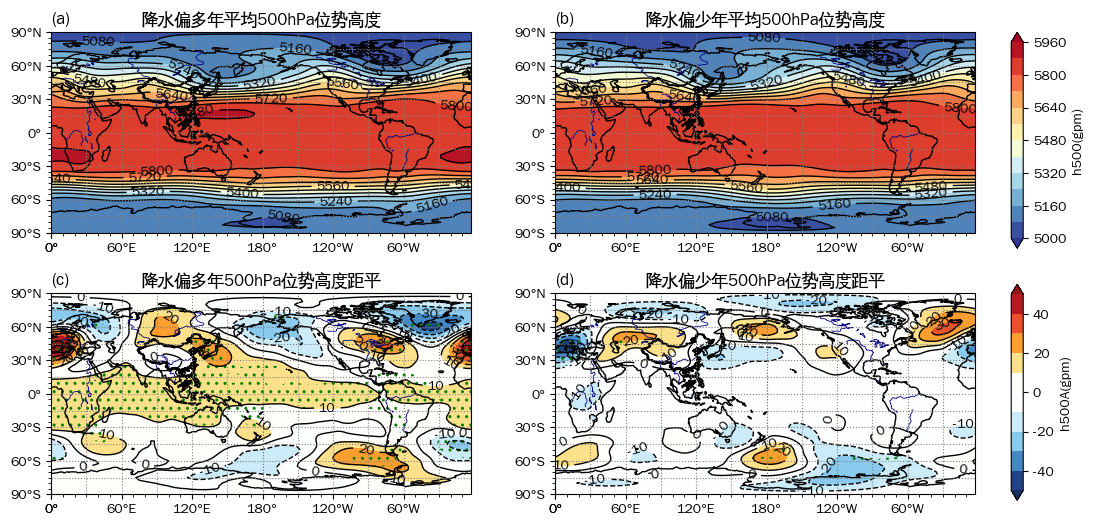

In [32]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(221, projection=ccrs.PlateCarree(central_longitude=180))
comset(ax)
m1 = ax.contourf(h500.lon,h500.lat,h500dhm,transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',
                levels=np.arange(5000,6000,80),extend='both'
               )
c1 = ax.contour(h500.lon,h500.lat,h500dhm,transform=ccrs.PlateCarree(),
               levels=np.arange(5000,6000,80),
               colors='k',linewidths=1)
ax.clabel(c1)

ax.set_title('降水偏多年平均500hPa位势高度')
ax.set_title('(a)',loc='left')

ax = fig.add_subplot(222, projection=ccrs.PlateCarree(central_longitude=180))
comset(ax)
m1 = ax.contourf(h500.lon,h500.lat,h500dlm,transform=ccrs.PlateCarree(),
                cmap='RdYlBu_r',
                levels=np.arange(5000,6000,80),extend='both'
               )
c1 = ax.contour(h500.lon,h500.lat,h500dlm,transform=ccrs.PlateCarree(),
               levels=np.arange(5000,6000,80),
               colors='k',linewidths=1)
ax.clabel(c1)

ax.set_title('降水偏少年平均500hPa位势高度')
ax.set_title('(b)',loc='left')

ax = fig.add_subplot(223, projection=ccrs.PlateCarree(central_longitude=180))
comset(ax)
m3 = ax.contourf(h500.lon,h500.lat,h500dah_m,transform=ccrs.PlateCarree(), cmap=cmaps.BlueWhiteOrangeRed,levels=np.arange(-50,51,10),extend='both')
c3 = ax.contour(h500.lon,h500.lat,h500dah_m,transform=ccrs.PlateCarree(),levels=np.arange(-50,51,10),colors='k',linewidths=1)
ax.clabel(c3)

ax.sig_plot(h500.lon,h500.lat,h500dah_pv, thrshd=0.05, marker='..', color='green')
ax.set_title('降水偏多年500hPa位势高度距平')
ax.set_title('(c)',loc='left')

ax = fig.add_subplot(224, projection=ccrs.PlateCarree(central_longitude=180))
comset(ax)
m3 = ax.contourf(h500.lon,h500.lat,h500dal_m,transform=ccrs.PlateCarree(), cmap=cmaps.BlueWhiteOrangeRed,levels=np.arange(-50,51,10),extend='both')
c3 = ax.contour(h500.lon,h500.lat,h500dal_m,transform=ccrs.PlateCarree(),levels=np.arange(-50,51,10),colors='k',linewidths=1)
ax.clabel(c3)

ax.sig_plot(h500.lon,h500.lat,h500dal_pv, thrshd=0.05, marker='..', color='green')
ax.set_title('降水偏少年500hPa位势高度距平')
ax.set_title('(d)',loc='left')

fig.subplots_adjust(left=0.13,hspace=0.3)
cbar1_ax = fig.add_axes([0.93, 0.52, 0.01, 0.36])
cbar3_ax = fig.add_axes([0.93, 0.10, 0.01, 0.36])
cb1 = fig.colorbar(m1, cax=cbar1_ax)
cb3 = fig.colorbar(m3, cax=cbar3_ax)
cb1.set_label('h500(gpm)')
cb3.set_label('h500A(gpm)')

# 合成850hPa 风场

In [33]:
u850 = xr.open_dataset('uwnd.mon.mean.nc')['uwnd'].loc['1960':'2023',850]
v850 = xr.open_dataset('vwnd.mon.mean.nc')['vwnd'].loc['1960':'2023',850]

u850d = scp.spec_moth_yrmean(u850,months=[12,1,2])
u850d_hm = u850d[u850d.time.isin(prdsc_hyr)].mean('time')
u850d_lm = u850d[u850d.time.isin(prdsc_lyr)].mean('time')
u850da = u850d - u850d.mean('time')
u850da_hm, u850da_hp = scp.one_mean_test(u850da[u850da.time.isin(prdsc_hyr)])
u850da_lm, u850da_lp = scp.one_mean_test(u850da[u850da.time.isin(prdsc_lyr)])

v850d = scp.spec_moth_yrmean(v850,months=[12,1,2])
v850d_hm = v850d[v850d.time.isin(prdsc_hyr)].mean('time')
v850d_lm = v850d[v850d.time.isin(prdsc_lyr)].mean('time')
v850da = v850d - v850d.mean('time')
v850da_hm, v850da_hp = scp.one_mean_test(v850da[v850da.time.isin(prdsc_hyr)])
v850da_lm, v850da_lp = scp.one_mean_test(v850da[v850da.time.isin(prdsc_lyr)])

In [34]:
wspd850h = np.sqrt(u850d_hm**2 + v850d_hm**2)
wspd850l = np.sqrt(u850d_lm**2 + v850d_lm**2)
wspd850ha = np.sqrt(u850da_hm**2 + v850da_hm**2)
wspd850la = np.sqrt(u850da_lm**2 + v850da_lm**2)

/usr/local/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '
/usr/local/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '
/usr/local/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


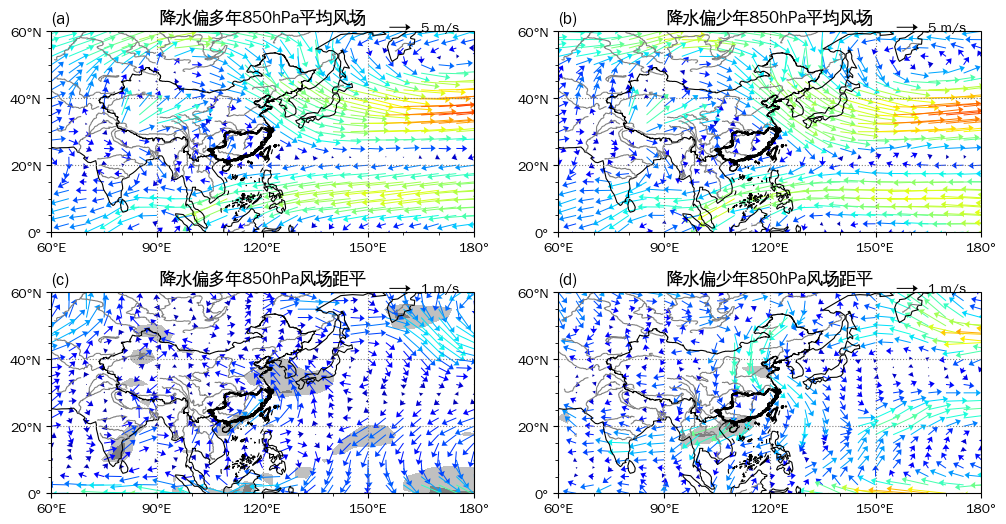

In [35]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(221, projection=ccrs.PlateCarree(central_longitude=180))
comset3(ax)
q = ax.quiver(u850.lon[::2],u850.lat[::1],u850d_hm[::1,::2].to_numpy(),v850d_hm[::1,::2].to_numpy(),wspd850h[::1,::2].to_numpy(),transform=ccrs.PlateCarree(),
            scale = 100,cmap='jet',headwidth=7)
ax.quiverkey(q, 0.85, 1.02, 5, '5 m/s', labelpos='E')
ax.set_title('降水偏多年850hPa平均风场')
ax.set_title('(a)',loc='left')

ax = fig.add_subplot(222, projection=ccrs.PlateCarree(central_longitude=180))
comset3(ax)
q = ax.quiver(u850.lon[::2],u850.lat[::1],u850d_lm[::1,::2].to_numpy(),v850d_lm[::1,::2].to_numpy(),wspd850l[::1,::2].to_numpy(),transform=ccrs.PlateCarree(),
            scale = 100,cmap='jet',headwidth=7)
ax.quiverkey(q, 0.85, 1.02, 5, '5 m/s', labelpos='E')
ax.set_title('降水偏少年850hPa平均风场')
ax.set_title('(b)',loc='left')

ax = fig.add_subplot(223, projection=ccrs.PlateCarree(central_longitude=180))
comset3(ax)
ax.contourf(u850da.lon,u850da.lat,np.maximum(u850da_hp,v850da_hp),transform=ccrs.PlateCarree(), 
            levels=[0,0.05,0.15,1],colors=['grey','silver',(0,0,0,0)])
q = ax.quiver(u850da.lon[::2],u850da.lat[::1],u850da_hm[::1,::2],v850da_hm[::1,::2],wspd850ha[::1,::2],transform=ccrs.PlateCarree(),
        scale = 20,cmap='jet',headwidth=7)
ax.quiverkey(q, 0.85, 1.02, 1, '1 m/s', labelpos='E')
ax.set_title('降水偏多年850hPa风场距平')
ax.set_title('(c)',loc='left')

ax = fig.add_subplot(224, projection=ccrs.PlateCarree(central_longitude=180))
comset3(ax)
ax.contourf(u850da.lon,u850da.lat,np.maximum(u850da_lp,v850da_lp),transform=ccrs.PlateCarree(), 
            levels=[0,0.05,0.15,1],colors=['grey','silver',(0,0,0,0)])
q = ax.quiver(u850da.lon[::2],u850da.lat[::1],u850da_lm[::1,::2],v850da_lm[::1,::2],wspd850la[::1,::2],transform=ccrs.PlateCarree(),
        scale = 20,cmap='jet',headwidth=7)
ax.quiverkey(q, 0.85, 1.02, 1, '1 m/s', labelpos='E')
ax.set_title('降水偏少年850hPa风场距平')
ax.set_title('(d)',loc='left')

fig.subplots_adjust(hspace=0.3)

# 合成200hPa 风场

In [36]:
u200 = xr.open_dataset('uwnd.mon.mean.nc')['uwnd'].loc['1960':'2023',200]
v200 = xr.open_dataset('vwnd.mon.mean.nc')['vwnd'].loc['1960':'2023',200]

u200d = scp.spec_moth_yrmean(u200,months=[12,1,2])
u200d_hm = u200d[u200d.time.isin(prdsc_hyr)].mean('time')
u200d_lm = u200d[u200d.time.isin(prdsc_lyr)].mean('time')
u200da = u200d - u200d.mean('time')
u200da_hm, u200da_hp = scp.one_mean_test(u200da[u200da.time.isin(prdsc_hyr)])
u200da_lm, u200da_lp = scp.one_mean_test(u200da[u200da.time.isin(prdsc_lyr)])

v200d = scp.spec_moth_yrmean(v200,months=[12,1,2])
v200d_hm = v200d[v200d.time.isin(prdsc_hyr)].mean('time')
v200d_lm = v200d[v200d.time.isin(prdsc_lyr)].mean('time')
v200da = v200d - v200d.mean('time')
v200da_hm, v200da_hp = scp.one_mean_test(v200da[v200da.time.isin(prdsc_hyr)])
v200da_lm, v200da_lp = scp.one_mean_test(v200da[v200da.time.isin(prdsc_lyr)])

In [37]:
wspd200h = np.sqrt(u200d_hm**2 + v200d_hm**2)
wspd200l = np.sqrt(u200d_lm**2 + v200d_lm**2)
wspd200ha = np.sqrt(u200da_hm**2 + v200da_hm**2)
wspd200la = np.sqrt(u200da_lm**2 + v200da_lm**2)

In [38]:
fig = plt.figure(figsize=[15,9])
ax = fig.add_subplot(221, projection=ccrs.PlateCarree(central_longitude=180))
comset3(ax)
q = ax.quiver(u200.lon[::2],u200.lat[::1],u200d_hm[::1,::2].to_numpy(),v200d_hm[::1,::2].to_numpy(),wspd200h[::1,::2].to_numpy(),transform=ccrs.PlateCarree(),
            scale = 200,headwidth=7,zorder=2,cmap='jet')
ax.quiverkey(q, 0.85, 1.02, 10, '10 m/s', labelpos='E')
ax.set_title('降水偏多年200hPa平均风场')

ax = fig.add_subplot(222, projection=ccrs.PlateCarree(central_longitude=180))
comset3(ax)
q = ax.quiver(u200.lon[::2],u200.lat[::1],u200d_lm[::1,::2].to_numpy(),v200d_lm[::1,::2].to_numpy(),wspd200l[::1,::2].to_numpy(),transform=ccrs.PlateCarree(),
            scale = 200,headwidth=7,zorder=2,cmap='jet')
ax.quiverkey(q, 0.85, 1.02, 10, '10 m/s', labelpos='E')
ax.set_title('降水偏少年200hPa平均风场')

ax = fig.add_subplot(223, projection=ccrs.PlateCarree(central_longitude=180))
comset3(ax)
ax.contourf(u200da.lon,u200da.lat,np.maximum(u200da_hp,v200da_hp),transform=ccrs.PlateCarree(), 
            levels=[0,0.05,0.15,1],colors=['grey','silver',(0,0,0,0)])
q = ax.quiver(u200da.lon[::2],u200da.lat[::1],u200da_hm[::1,::2],v200da_hm[::1,::2],wspd200ha[::1,::2],transform=ccrs.PlateCarree(),
        scale = 35,headwidth=7,zorder=2,cmap='jet')
ax.quiverkey(q, 0.85, 1.02, 1, '1 m/s', labelpos='E')
ax.set_title('降水偏多年200hPa平均风场距平')

ax = fig.add_subplot(224, projection=ccrs.PlateCarree(central_longitude=180))
comset3(ax)
ax.contourf(u200da.lon,u200da.lat,np.maximum(u200da_lp,v200da_lp),transform=ccrs.PlateCarree(), 
            levels=[0,0.05,0.15,1],colors=['grey','silver',(0,0,0,0)])
q = ax.quiver(u200da.lon[::2],u200da.lat[::1],u200da_lm[::1,::2],v200da_lm[::1,::2],wspd200la[::1,::2],transform=ccrs.PlateCarree(),
        scale = 35,headwidth=7,zorder=2,cmap='jet')
ax.quiverkey(q, 0.85, 1.02, 1, '1 m/s', labelpos='E')
ax.set_title('降水偏少年200hPa平均风场距平')

/usr/local/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '
/usr/local/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '
/usr/local/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


Text(0.5, 1.0, '降水偏少年200hPa平均风场距平')

## 纬向风

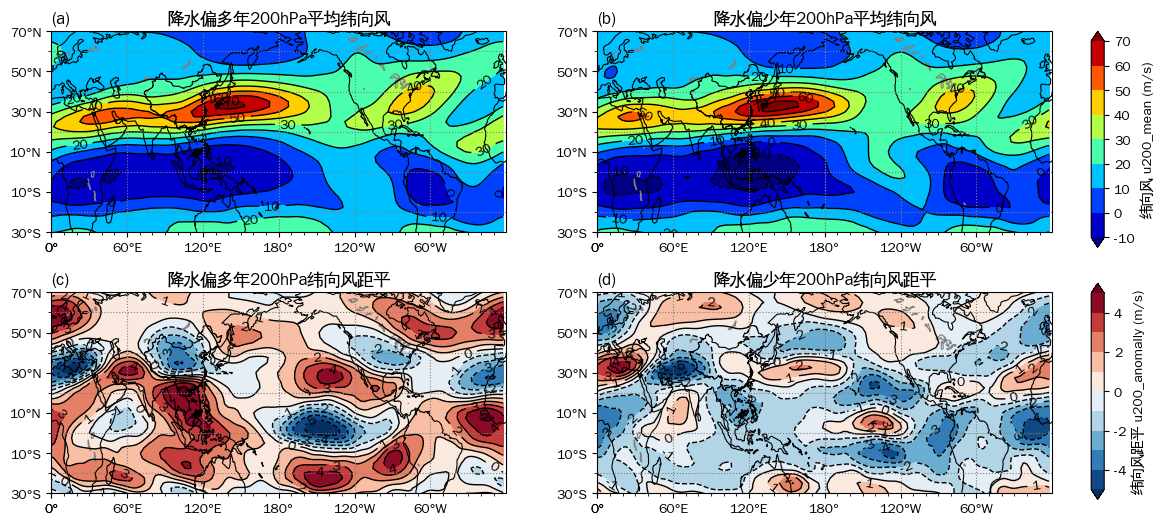

In [39]:
fig = plt.figure(figsize=[13,6])
ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree(central_longitude=180))
comset4(ax1)
# c1 = ax1.contour(u200.lon,u200.lat,u200d_hm,transform=ccrs.PlateCarree(),levels=np.arange(-10,71,10))
m1 = ax1.contourf(u200.lon,u200.lat,u200d_hm,transform=ccrs.PlateCarree(),levels=np.arange(-10,71,10),extend='both',cmap='jet')
c1 = ax1.contour(u200.lon,u200.lat,u200d_hm,transform=ccrs.PlateCarree(),levels=np.arange(-10,71,10),colors='k',linewidths=1)
ax1.clabel(c1)
ax1.set_title('降水偏多年200hPa平均纬向风')
ax1.set_title('(a)',loc='left')

ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree(central_longitude=180))
comset4(ax2)
m2 = ax2.contourf(u200.lon,u200.lat,u200d_lm,transform=ccrs.PlateCarree(),levels=np.arange(-10,71,10),extend='both',cmap='jet')
c2 = ax2.contour(u200.lon,u200.lat,u200d_lm,transform=ccrs.PlateCarree(),levels=np.arange(-10,71,10),colors='k',linewidths=1)
ax2.clabel(c2)
ax2.set_title('降水偏少年200hPa平均纬向风')
ax2.set_title('(b)',loc='left')

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree(central_longitude=180))
comset4(ax3)
# ax.contourf(u200da.lon,u200da.lat,np.maximum(u200da_hp,v200da_hp),transform=ccrs.PlateCarree(), 
#             levels=[0,0.05,0.15,1],colors=['grey','silver',(0,0,0,0)])
m3 = ax3.contourf(u200da.lon,u200da.lat,u200da_hm,transform=ccrs.PlateCarree(),levels=np.arange(-5,5.01,1),extend='both',cmap='RdBu_r')
c3 = ax3.contour(u200da.lon,u200da.lat,u200da_hm,transform=ccrs.PlateCarree(),levels=np.arange(-5,5.01,1),colors='k',linewidths=1)
ax3.clabel(c3)
ax3.set_title('降水偏多年200hPa纬向风距平')
ax3.set_title('(c)',loc='left')

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree(central_longitude=180))
comset4(ax4)
# ax.contourf(u200da.lon,u200da.lat,np.maximum(u200da_lp,v200da_lp),transform=ccrs.PlateCarree(), 
#             levels=[0,0.05,0.15,1],colors=['grey','silver',(0,0,0,0)])
m4 = ax4.contourf(u200da.lon,u200da.lat,u200da_lm,transform=ccrs.PlateCarree(),levels=np.arange(-5,5.01,1),extend='both',cmap='RdBu_r')
c4 = ax4.contour(u200da.lon,u200da.lat,u200da_lm,transform=ccrs.PlateCarree(),levels=np.arange(-5,5.01,1),colors='k',linewidths=1)
ax4.clabel(c4)
ax4.set_title('降水偏少年200hPa纬向风距平')
ax4.set_title('(d)',loc='left')

# subplots_adjust
# cb = plt.colorbar(m)
# cb.set_label('mm/day')
fig.subplots_adjust(left=0.13,hspace=0.3)
cbar1_ax = fig.add_axes([0.93, 0.52, 0.01, 0.36])
cbar3_ax = fig.add_axes([0.93, 0.10, 0.01, 0.36])
cb1 = fig.colorbar(m1, cax=cbar1_ax)
cb3 = fig.colorbar(m3, cax=cbar3_ax)
cb1.set_label('纬向风 u200_mean (m/s)')
cb3.set_label('纬向风距平 u200_anomally (m/s)')

# 合成水汽相关量 - Moisture Flux (Divergence)

In [40]:
q_ = xr.open_dataset('shum.mon.mean.nc')['shum'].loc[{'time':slice('1960','2023'), 'level':slice(300,1000,-1)}]
u_ = xr.open_dataset('uwnd.mon.mean.nc')['uwnd'].loc[{'time':slice('1960','2023'), 'level':slice(300,1000,-1)}]
v_ = xr.open_dataset('vwnd.mon.mean.nc')['vwnd'].loc[{'time':slice('1960','2023'), 'level':slice(300,1000,-1)}]
q_ = xr.where(np.abs(q_)>100,np.nan,q_)

In [41]:
qd = scp.spec_moth_yrmean(q_, months=[12,1,2])*units('g/kg')
ud = scp.spec_moth_yrmean(u_, months=[12,1,2])*units('m/s')
vd = scp.spec_moth_yrmean(v_, months=[12,1,2])*units('m/s')

In [42]:
import metpy
dx,dy = metpy.grid_deltas_from_dataarray(qd)
qud = (ud*qd/constants.g)
qvd = (vd*qd/constants.g)
qdivd = mpcalc.divergence(qud,qvd,dx=dx,dy=dy)

# 计算整层水汽通量散度
total_qdivd = qdivd.integrate('level')*units('hPa')
total_qdivd = total_qdivd.metpy.convert_to_base_units()

# 计算整层水汽通量
total_qud = qud.integrate('level')*units('hPa')
total_qvd = qvd.integrate('level')*units('hPa')
total_quvd = np.sqrt(total_qud ** 2 + total_qvd ** 2)
total_quvd = total_quvd.metpy.convert_to_base_units()

/usr/local/lib/python3.10/site-packages/pint/facets/plain/quantity.py:1119: RuntimeWarning: invalid value encountered in divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


In [43]:
t_qdivda = total_qdivd - total_qdivd.mean('time')
t_qdivda_hm = t_qdivda[t_qdivda.time.isin(prdsc_hyr)].mean('time')
t_qdivda_lm = t_qdivda[t_qdivda.time.isin(prdsc_lyr)].mean('time')
t_quda = total_qud - total_qud.mean('time')
t_quda_hm = t_quda[t_quda.time.isin(prdsc_hyr)].mean('time')
t_quda_lm = t_quda[t_quda.time.isin(prdsc_lyr)].mean('time')
t_qvda = total_qvd - total_qvd.mean('time')
t_qvda_hm = t_qvda[t_qvda.time.isin(prdsc_hyr)].mean('time')
t_qvda_lm = t_qvda[t_qvda.time.isin(prdsc_lyr)].mean('time')
t_quvda = total_quvd - total_quvd.mean('time')
t_quvda_hm = t_quvda[t_quvda.time.isin(prdsc_hyr)].mean('time')
t_quvda_lm = t_quvda[t_quvda.time.isin(prdsc_lyr)].mean('time')

In [44]:
f'{t_qdivda_hm.metpy.units}',f'{total_qdivd.metpy.units}',f'{total_quvd.metpy.units}',f'{qdivd.metpy.units}',f'{qud.metpy.units}'

('kilogram / meter ** 2 / second',
 'kilogram / meter ** 2 / second',
 'kilogram / meter / second',
 'gram * second / kilogram / meter',
 'gram * second / kilogram')

In [45]:
t_qdivda_hm.quantile([0,0.25,0.5,0.75,1])

<xarray.DataArray (quantile: 5)>
<Quantity([-2.05038672e-02 -5.69553344e-06  1.51261481e-07  5.84458608e-06
  1.24739432e-02], 'kilogram / meter ** 2 / second')>
Coordinates:
  * quantile  (quantile) float64 0.0 0.25 0.5 0.75 1.0

/usr/local/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


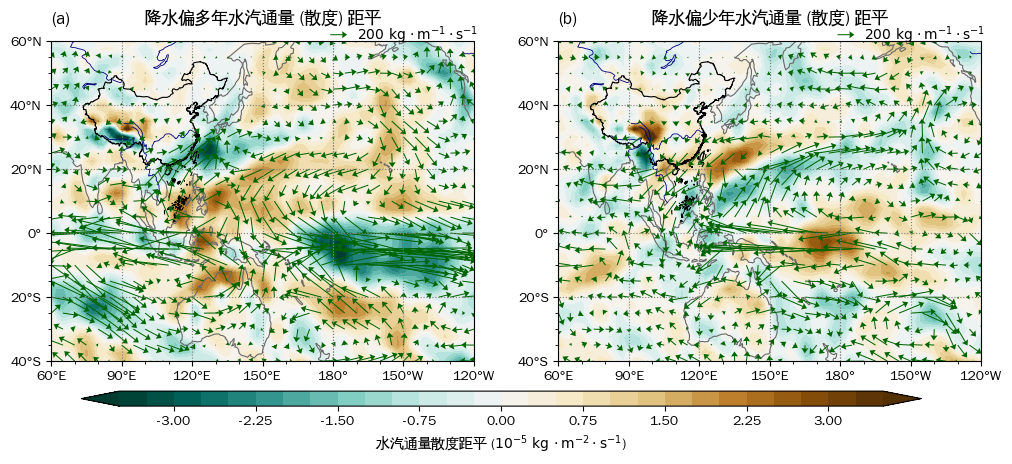

In [46]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(121, projection=ccrs.PlateCarree(central_longitude=180))
comset2(ax)
m = ax.contourf(qd.lon,qd.lat,t_qdivda_hm*10**5,transform=ccrs.PlateCarree(), 
                cmap='BrBG_r', levels=np.arange(-3.5,3.5001,0.25),extend='both')
q = ax.quiver(qd.lon[::2],qd.lat[::2],t_quda_hm[::2,::2].to_numpy(),t_qvda_hm[::2,::2].to_numpy(),transform=ccrs.PlateCarree(),
            color='darkgreen', scale=5000,headwidth=7, zorder=2)
ax.quiverkey(q, 0.7, 1.02, 200, '$200\ \operatorname{kg} \cdot \mathrm{m^{-1}} \cdot \mathrm{s^{-1}}$', labelpos='E')
ax.set_title('降水偏多年水汽通量 (散度) 距平', y=1.03)
ax.set_title('(a)',loc='left',y=1.03)

ax = fig.add_subplot(122, projection=ccrs.PlateCarree(central_longitude=180))
comset2(ax)
m = ax.contourf(qd.lon,qd.lat,t_qdivda_lm*10**5,transform=ccrs.PlateCarree(), 
                cmap='BrBG_r', levels=np.arange(-3.5,3.5001,0.25),extend='both')
q = ax.quiver(qd.lon[::2],qd.lat[::2],t_quda_lm[::2,::2].to_numpy(),t_qvda_lm[::2,::2].to_numpy(),transform=ccrs.PlateCarree(),
            color='darkgreen', scale=5000,headwidth=7, zorder=2)
ax.quiverkey(q, 0.7, 1.02, 200, '$200\ \operatorname{kg} \cdot \mathrm{m^{-1}} \cdot \mathrm{s^{-1}}$', labelpos='E')
ax.set_title('降水偏少年水汽通量 (散度) 距平', y=1.03)
ax.set_title('(b)',loc='left',y=1.03)

fig.subplots_adjust(bottom=0.24)
cbar_ax = fig.add_axes([0.15, 0.15, 0.7, 0.03])
cb = fig.colorbar(m, cax=cbar_ax, orientation='horizontal')
cb.set_label('水汽通量散度距平 ($10^{-5}\ \operatorname{kg} \cdot \mathrm{m^{-2}} \cdot \mathrm{s^{-1}}$)')

# $\omega$

In [47]:
omega = xr.open_dataset('omega.mon.mean.nc')['omega'].loc[{'time':slice('1960','2023'),'level':500}]
omegad = scp.spec_moth_yrmean(omega,months=[12,1,2])
omegadm = omegad.mean('time')
omegada = omegad - omegadm 
omegad_hm = omegad[omegad.time.isin(prdsc_hyr)].mean('time')
omegad_lm = omegad[omegad.time.isin(prdsc_lyr)].mean('time')
omegada_hm, omegada_hp = scp.one_mean_test(omegada[omegada.time.isin(prdsc_hyr)])
omegada_lm, omegada_lp = scp.one_mean_test(omegada[omegada.time.isin(prdsc_lyr)])

/usr/local/lib/python3.10/site-packages/cmaps/cmaps.py:3495: UserWarning: Overwriting the cmap 'NEO_div_vegetation_a_r' that was already in the registry.
  matplotlib.cm.register_cmap(name=cname, cmap=cmap)
/usr/local/lib/python3.10/site-packages/cmaps/cmaps.py:3495: UserWarning: Overwriting the cmap 'NEO_div_vegetation_a_r' that was already in the registry.
  matplotlib.cm.register_cmap(name=cname, cmap=cmap)
/usr/local/lib/python3.10/site-packages/cmaps/cmaps.py:3495: UserWarning: Overwriting the cmap 'NEO_div_vegetation_a_r' that was already in the registry.
  matplotlib.cm.register_cmap(name=cname, cmap=cmap)


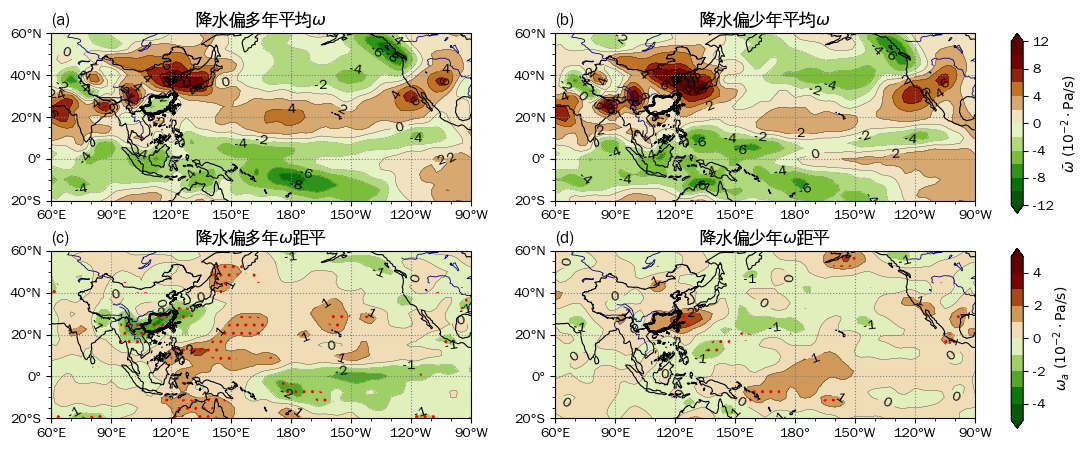

In [48]:
fig = plt.figure(figsize=[12,5])

ax = fig.add_subplot(221,projection=ccrs.PlateCarree(central_longitude=180))
comset5(ax)
m1 = ax.contourf(omegad.lon,omegad.lat,omegad_hm*10**2,transform=ccrs.PlateCarree(),
                cmap=cmaps.NEO_div_vegetation_a_r,levels=np.arange(-12,12.01,2),extend='both'
                )
c = ax.contour(omegad.lon,omegad.lat,omegad_hm*10**2,transform=ccrs.PlateCarree(),
                levels=np.arange(-12,12.01,2),colors='k',linewidths=0.2
                )
ax.clabel(c)
ax.set_title('降水偏多年平均$\omega$')
ax.set_title('(a)', loc='left')

ax = fig.add_subplot(222,projection=ccrs.PlateCarree(central_longitude=180))
comset5(ax)
m1 = ax.contourf(omegad.lon,omegad.lat,omegad_lm*10**2,transform=ccrs.PlateCarree(),
                cmap=cmaps.NEO_div_vegetation_a_r,levels=np.arange(-12,12.01,2),extend='both'
                )
c = ax.contour(omegad.lon,omegad.lat,omegad_lm*10**2,transform=ccrs.PlateCarree(),
                levels=np.arange(-12,12.01,2),colors='k',linewidths=0.2
                )
ax.clabel(c)
ax.set_title('降水偏少年平均$\omega$')
ax.set_title('(b)', loc='left')

ax = fig.add_subplot(223,projection=ccrs.PlateCarree(central_longitude=180))
comset5(ax)
m2 = ax.contourf(omegad.lon,omegad.lat,omegada_hm*10**2,transform=ccrs.PlateCarree(),
                cmap=cmaps.NEO_div_vegetation_a_r,levels=np.arange(-5,5.01,1),extend='both'
                )
c = ax.contour(omegad.lon,omegad.lat,omegada_hm*10**2,transform=ccrs.PlateCarree(),
                levels=np.arange(-5,5.01,1),colors='k',linewidths=0.2
                )
ax.sig_plot(omegad.lon,omegad.lat,omegada_hp, thrshd=0.05, marker='..', color='red')
ax.clabel(c)
ax.set_title('降水偏多年$\omega$距平')
ax.set_title('(c)', loc='left')

ax = fig.add_subplot(224,projection=ccrs.PlateCarree(central_longitude=180))
comset5(ax)
m2 = ax.contourf(omegad.lon,omegad.lat,omegada_lm*10**2,transform=ccrs.PlateCarree(),
                cmap=cmaps.NEO_div_vegetation_a_r,levels=np.arange(-5,5.01,1),extend='both'
                )
c = ax.contour(omegad.lon,omegad.lat,omegada_lm*10**2,transform=ccrs.PlateCarree(),
                levels=np.arange(-5,5.01,1),colors='k',linewidths=0.2
                )
ax.sig_plot(omegad.lon,omegad.lat,omegada_lp, thrshd=0.05, marker='..', color='red')
ax.clabel(c)
ax.set_title('降水偏少年$\omega$距平')
ax.set_title('(d)', loc='left')

fig.subplots_adjust(left=0.13,hspace=0.3)
cbar1_ax = fig.add_axes([0.93, 0.52, 0.01, 0.36])
cbar2_ax = fig.add_axes([0.93, 0.09, 0.01, 0.36])
cb1 = fig.colorbar(m1, cax=cbar1_ax)
cb2 = fig.colorbar(m2, cax=cbar2_ax)
cb1.set_label(r'$\bar{\omega}\ (10^{-2} \cdot \mathrm{Pa}/\mathrm{s})$')
cb2.set_label(r'$\omega_{a}\ (10^{-2} \cdot \mathrm{Pa}/\mathrm{s})$')

# 海温SST

In [49]:
sst = xr.open_dataset('sst.mnmean.nc')['sst'].loc[{'time':slice('1960','2023')}]
# sstd = scp.spec_moth_yrmean(sst,months=[12,1,2])
# sstdm = sstd.mean('time')
# sstda = sstd - sstdm
# sstd_hm = sstd[sstd.time.isin(prdsc_hyr)].mean('time')
# sstd_lm = sstd[sstd.time.isin(prdsc_lyr)].mean('time')
# sstda_hm, sstda_hp = scp.one_mean_test(sstda[sstda.time.isin(prdsc_hyr)])
# sstda_lm, sstda_lp = scp.one_mean_test(sstda[sstda.time.isin(prdsc_lyr)])

In [50]:
sstd = scp.spec_moth_yrmean(sst,months=[12,1,2])
ssts = scp.spec_moth_yrmean(sst,months=[9,10,11])
sstj = scp.spec_moth_yrmean(sst,months=[6,7,8])
sstda = sstd - sstd.mean('time')
sstsa = ssts - ssts.mean('time')
sstja = sstj - sstj.mean('time')
lind = scp.LinReg(x=scwpi,y=sstda)
lins = scp.LinReg(x=scwpi,y=sstsa)
linj = scp.LinReg(x=scwpi,y=sstja)

/usr/local/lib/python3.10/site-packages/sacpy/linger_cal.py:39: RuntimeWarning: invalid value encountered in divide
  corr = covar / y_std / x_std


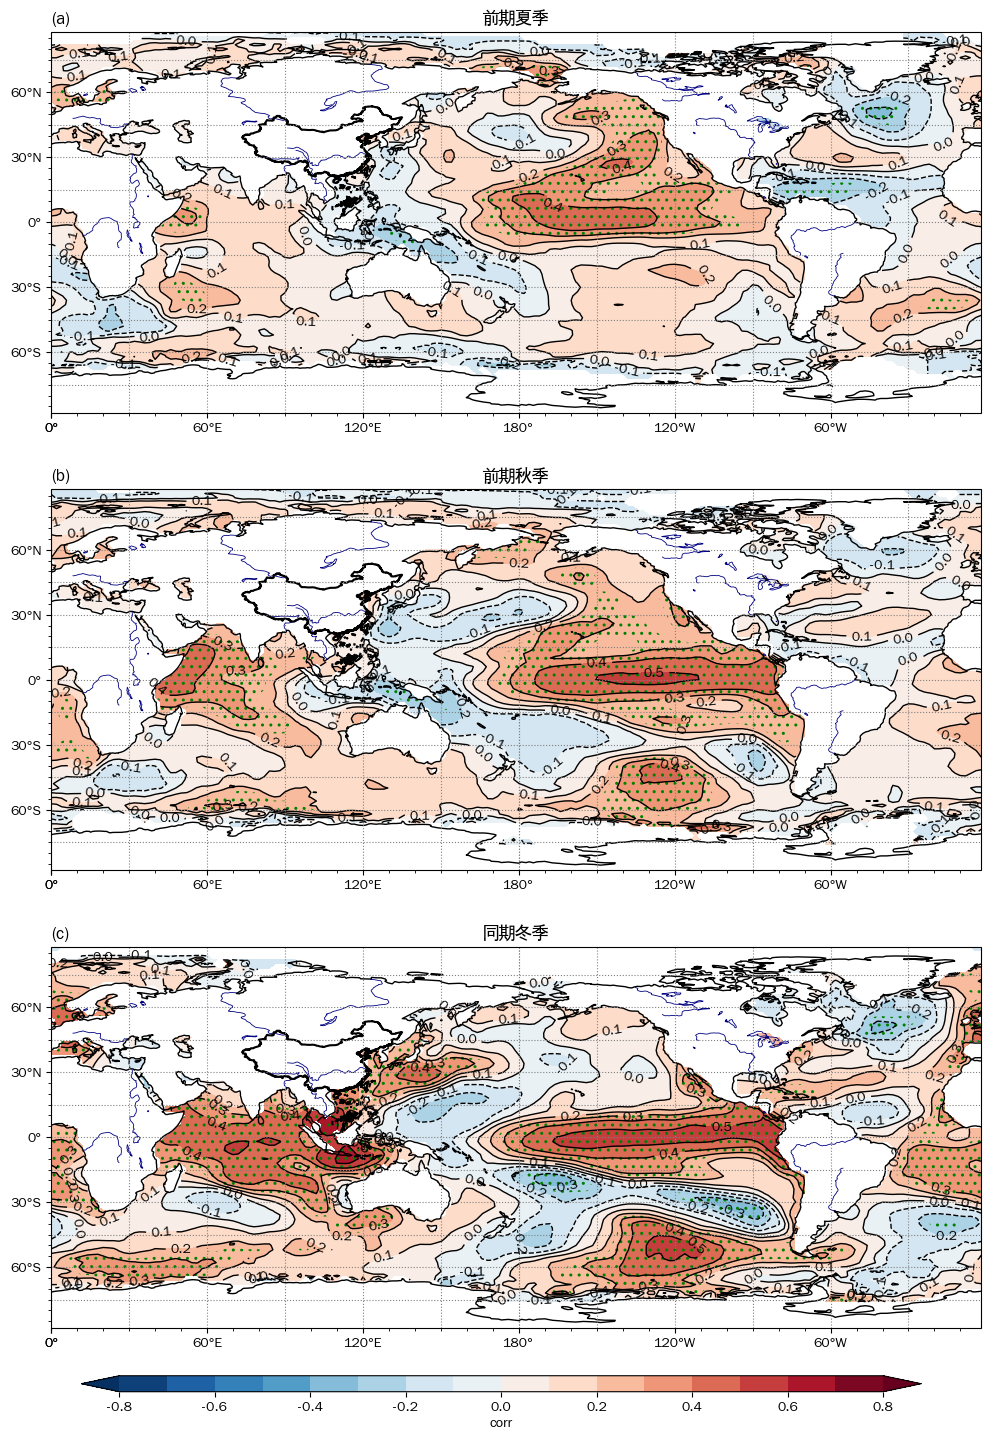

In [51]:
fig = plt.figure(figsize=[12,16])
ax = fig.add_subplot(311, projection=ccrs.PlateCarree(central_longitude=180))
comset(ax)
m = ax.contourf(sst.lon,sst.lat,linj.corr,transform=ccrs.PlateCarree(), cmap='RdBu_r',
                levels=np.arange(-0.8,0.801,0.1),extend='both'
               )
c = ax.contour(sst.lon,sst.lat,linj.corr,transform=ccrs.PlateCarree(),
               levels=np.arange(-0.8,0.801,0.1),colors='k',linewidths=1
              )
# cb = plt.colorbar(m)
ax.clabel(c)
ax.sig_plot(sst.lon,sst.lat,linj.p_value, thrshd=0.05, marker='..', color='green')
ax.set_title('前期夏季')
ax.set_title('(a)',loc='left')

ax = fig.add_subplot(312, projection=ccrs.PlateCarree(central_longitude=180))
comset(ax)
m = ax.contourf(sst.lon,sst.lat,lins.corr,transform=ccrs.PlateCarree(), cmap='RdBu_r',
                levels=np.arange(-0.8,0.801,0.1),extend='both'
               )
c = ax.contour(sst.lon,sst.lat,lins.corr,transform=ccrs.PlateCarree(),
               levels=np.arange(-0.8,0.801,0.1),colors='k',linewidths=1
              )
# cb = plt.colorbar(m)
ax.clabel(c)
ax.sig_plot(sst.lon,sst.lat,lins.p_value, thrshd=0.05, marker='..', color='green')
ax.set_title('前期秋季')
ax.set_title('(b)',loc='left')

ax = fig.add_subplot(313, projection=ccrs.PlateCarree(central_longitude=180))
comset(ax)
m = ax.contourf(sst.lon,sst.lat,lind.corr,transform=ccrs.PlateCarree(), cmap='RdBu_r',
                levels=np.arange(-0.8,0.801,0.1),extend='both'
               )
c = ax.contour(sst.lon,sst.lat,lind.corr,transform=ccrs.PlateCarree(),
               levels=np.arange(-0.8,0.801,0.1),colors='k',linewidths=1
              )
# cb = plt.colorbar(m)
ax.clabel(c)
ax.sig_plot(sst.lon,sst.lat,lind.p_value, thrshd=0.05, marker='..', color='green')
ax.set_title('同期冬季')
ax.set_title('(c)',loc='left')

fig.subplots_adjust(bottom=0.07)
cbar_ax = fig.add_axes([0.15, 0.03, 0.7, 0.01])
cb = fig.colorbar(m, cax=cbar_ax, orientation='horizontal')
cb.set_label('corr')

## 关键区海温距平区域平均标准化序列

In [52]:
nino34d = sstda.loc[:,5:-5,190:240].mean(('lat','lon'))
wnp1d = sstda.loc[:,35:25,130:140].mean(('lat','lon'))
ido1d = sstda.loc[:,5:-5,60:90].mean(('lat','lon'))
mc1d = sstda.loc[:,15:-15,100:120].mean(('lat','lon'))

In [53]:
nino34di = nino34d/nino34d.std()
wnp1di = wnp1d/wnp1d.std()
ido1di = ido1d/ido1d.std()
mc1di = mc1d/mc1d.std()

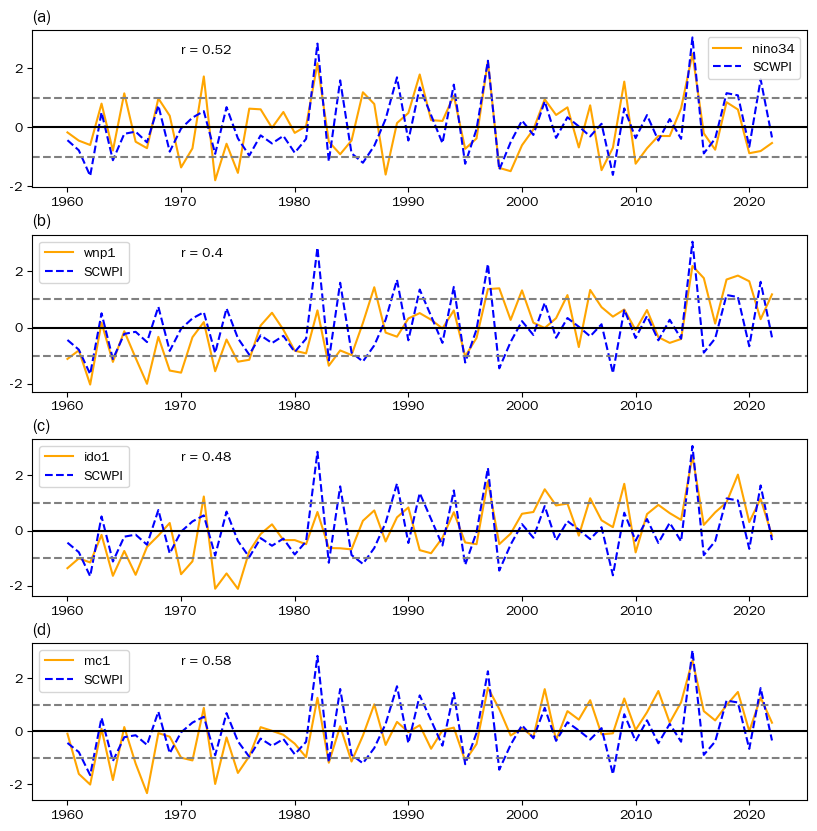

In [54]:
fig=plt.figure(figsize=[10,10])
ax = fig.add_subplot(411)
ax.plot(scwpi.time, nino34di, color='orange', label='nino34')
ax.plot(scwpi.time, scwpi, 'b', linestyle='--', label='SCWPI')
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=1, color='gray', linestyle='--')
ax.axhline(y=-1, color='gray', linestyle='--')
ax.legend()
ax.set_title('(a)', loc='left')
ax.text(1970,2.5,f'r = {scp.LinReg(x=nino34di, y=scwpi).corr:.2}')

ax = fig.add_subplot(412)
ax.plot(scwpi.time, wnp1di, color='orange', label='wnp1')
ax.plot(scwpi.time, scwpi, 'b', linestyle='--', label='SCWPI')
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=1, color='gray', linestyle='--')
ax.axhline(y=-1, color='gray', linestyle='--')
ax.legend()
ax.text(1970,2.5,f'r = {scp.LinReg(x=wnp1di, y=scwpi).corr:.2}')
ax.set_title('(b)', loc='left')

ax = fig.add_subplot(413)
ax.plot(scwpi.time, ido1di, color='orange', label='ido1')
ax.plot(scwpi.time, scwpi, 'b', linestyle='--', label='SCWPI')
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=1, color='gray', linestyle='--')
ax.axhline(y=-1, color='gray', linestyle='--')
ax.legend()
plt.text(1970,2.5,f'r = {scp.LinReg(x=ido1di, y=scwpi).corr:.2}')
ax.set_title('(c)', loc='left')
ax = fig.add_subplot(414)
ax.plot(scwpi.time, mc1di, color='orange', label='mc1')
ax.plot(scwpi.time, scwpi, 'b', linestyle='--', label='SCWPI')
ax.axhline(y=0, color='black', linestyle='-')
ax.axhline(y=1, color='gray', linestyle='--')
ax.axhline(y=-1, color='gray', linestyle='--')
ax.legend()
ax.text(1970,2.5,f'r = {scp.LinReg(x=mc1di, y=scwpi).corr:.2}')
ax.set_title('(d)', loc='left')
fig.subplots_adjust(hspace=0.3)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=971f4ee0-3238-4c75-8630-2ef1e8ea4a4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>